# Working with Time Series in Pandas

In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt

## How to use dates & Times with Pandas

### Your first time series
You have learned in the video how to create a sequence of dates using ```pd.date_range()```. You have also seen that each date in the resulting ```pd.DatetimeIndex``` is a ```pd.Timestamp``` with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the ```dayofweek``` and ```weekday_name``` for each date.

In [2]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7)
 
# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


## Indexing & Resampling Time Series

### Create a time series of air quality data
You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as ```string types```, represented as ```dtype``` ```object``` in ```pandas```.

Use a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of ```pd.to_datetime()```.

In [3]:
data = pd.read_csv('Data/air_quality/nyc.csv')
data.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035162,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [4]:
# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


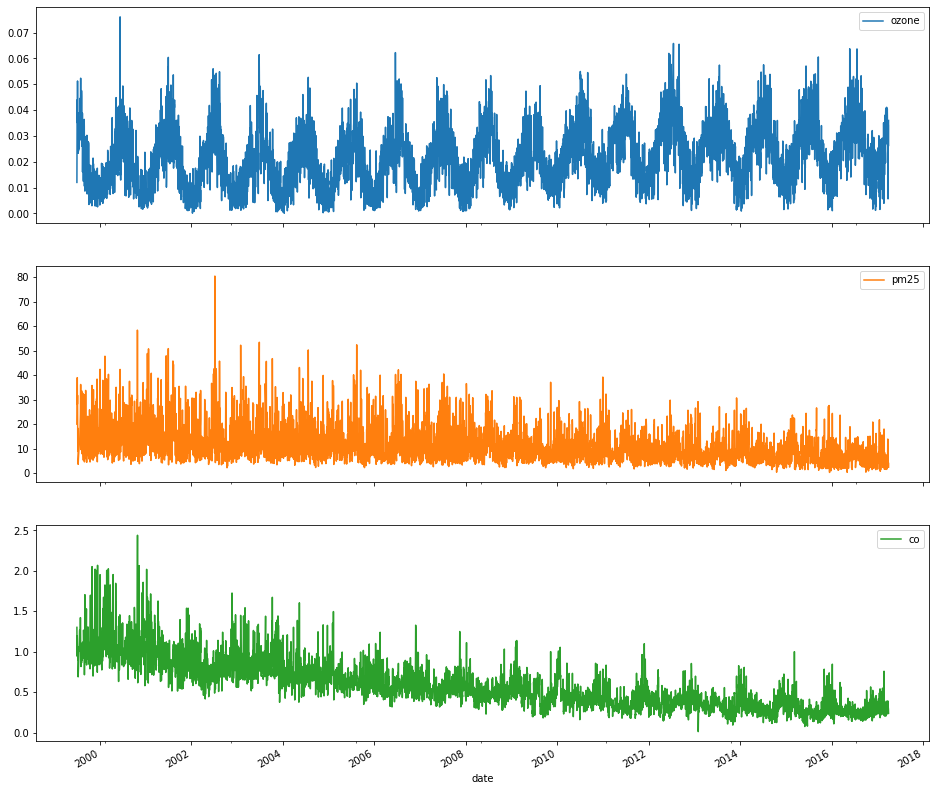

In [5]:
# Plot data
data.plot(subplots=True, figsize=(16,15))
plt.show()

### Compare annual stock price trends
In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.

In [6]:
# Import yahoo data
yahoo = pd.read_csv('Data/stock_data/yahoo.csv')
yahoo.head()

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66


In [7]:
# Convert the date column to datetime64
yahoo.date = pd.to_datetime(yahoo.date)

# Set date column as index
yahoo.set_index('date', inplace=True)

# Inspect data 
print(yahoo.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB
None


In [8]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

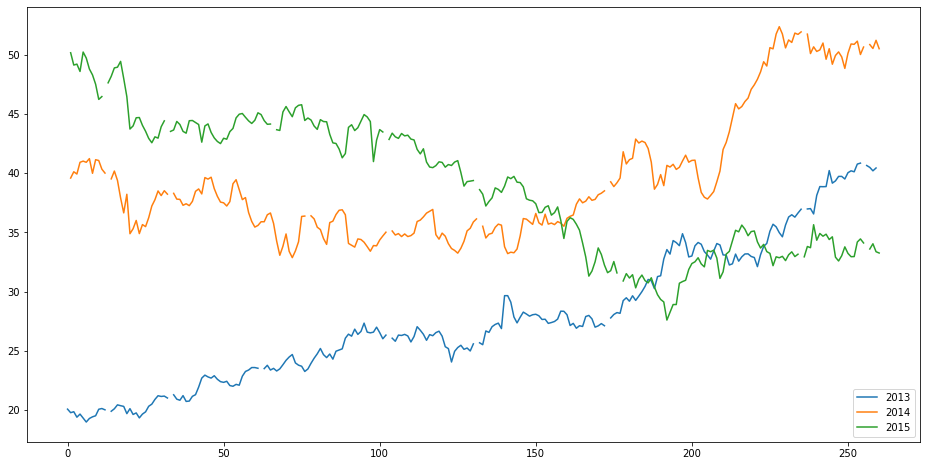

In [9]:
# Plot prices
prices.plot(figsize=(16,8))
plt.show()

### Set and change time series frequency
In the video, you have seen how to assign a frequency to a ```DateTimeIndex```, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [10]:
# Import co cities data
co = pd.read_csv('Data/air_quality/co_cities.csv')
co.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761


In [11]:
# Convert the date column to datetime64
co.date = pd.to_datetime(co.date)

# Set date column as index
co.set_index('date', inplace=True)

# Inspect data 
print(co.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


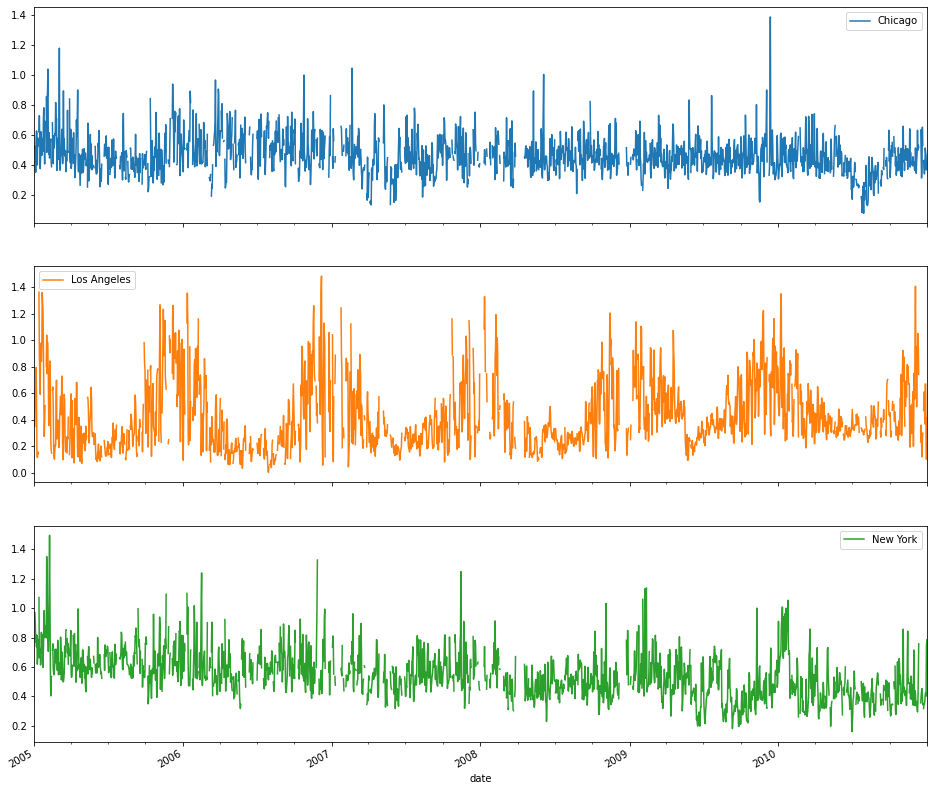

In [12]:
# Set the frequency to calendar daily
co = co.asfreq('D')
 
# Plot the data
co.plot(subplots=True, figsize=(16,15))
plt.show()

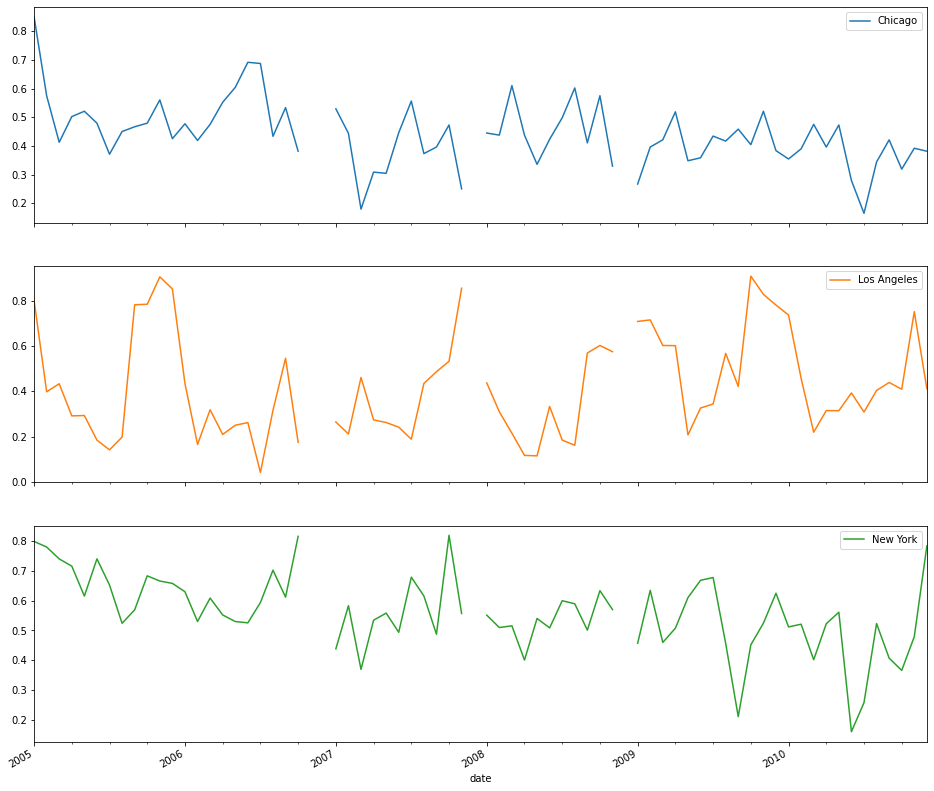

In [13]:
# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True, figsize=(16,15))
plt.show()

## Lags, changes, and returns for Stock Price Series

In [14]:
# Import yahoo data
google = pd.read_csv('Data/stock_data/google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


### Shifting stock prices across time
The first method to manipulate time series that you saw in the video was ```.shift()```, which allows you shift all values in a ```Series``` or ```DataFrame``` by a number of periods to a different time along the ```DateTimeIndex```.

In [15]:
# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(-90)
google['shifted'] = google.Close.shift(90)

print(google.head())
print(google.tail())

             Close  lagged  shifted
Date                               
2014-01-02  556.00  511.00      NaN
2014-01-03  551.95  518.73      NaN
2014-01-06  558.10  529.92      NaN
2014-01-07  568.86  533.09      NaN
2014-01-08  570.04  526.65      NaN
             Close  lagged  shifted
Date                               
2016-12-26     NaN     NaN   772.15
2016-12-27  791.55     NaN   772.08
2016-12-28  785.05     NaN   769.64
2016-12-29  782.79     NaN   769.41
2016-12-30  771.82     NaN   769.54


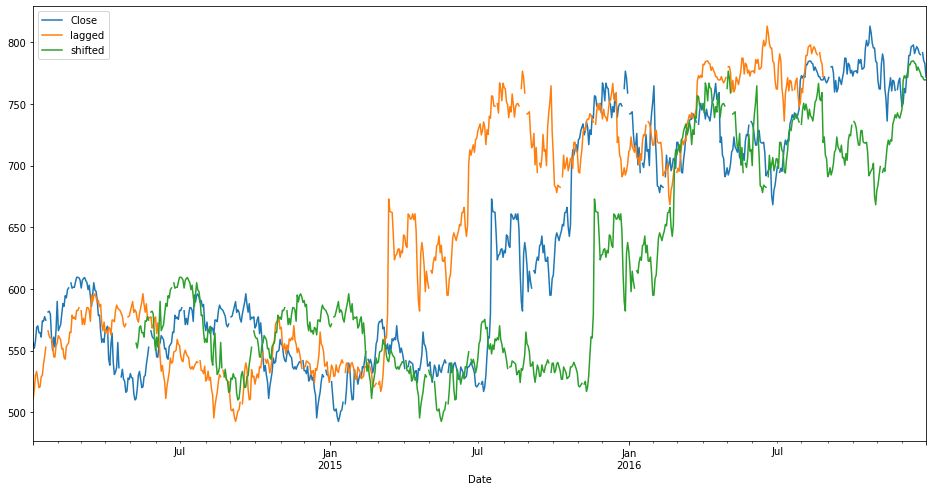

In [16]:
# Plot the google price series
google.plot(figsize=(16,8))
plt.show()

### Calculating stock price changes
You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().

In [17]:
# Created shifted_30 here
google['shifted_30'] = google.Close.shift(periods=30)
 
# Subtract shifted_30 from price
google['change_30'] = google['Close'] - google['shifted_30']
 
# Get the 30-day price difference
google['diff_30'] = google.Close.diff(periods=30)

In [18]:
# Inspect the last five rows of price
print(google.tail())

print('---------------------------------')

# Show the value_counts of the difference between change_30 and diff_30
print(google.change_30.sub(google.diff_30).value_counts())

             Close  lagged  shifted  shifted_30  change_30  diff_30
Date                                                               
2016-12-26     NaN     NaN   772.15      736.08        NaN      NaN
2016-12-27  791.55     NaN   772.08      758.49      33.06    33.06
2016-12-28  785.05     NaN   769.64      764.48      20.57    20.57
2016-12-29  782.79     NaN   769.41      771.23      11.56    11.56
2016-12-30  771.82     NaN   769.54      760.54      11.28    11.28
---------------------------------
0.0    703
dtype: int64


### Plotting multi-period returns
The last time series method you have learned about in the video was .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

In [19]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(1).mul(100)
 
# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)
 
# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

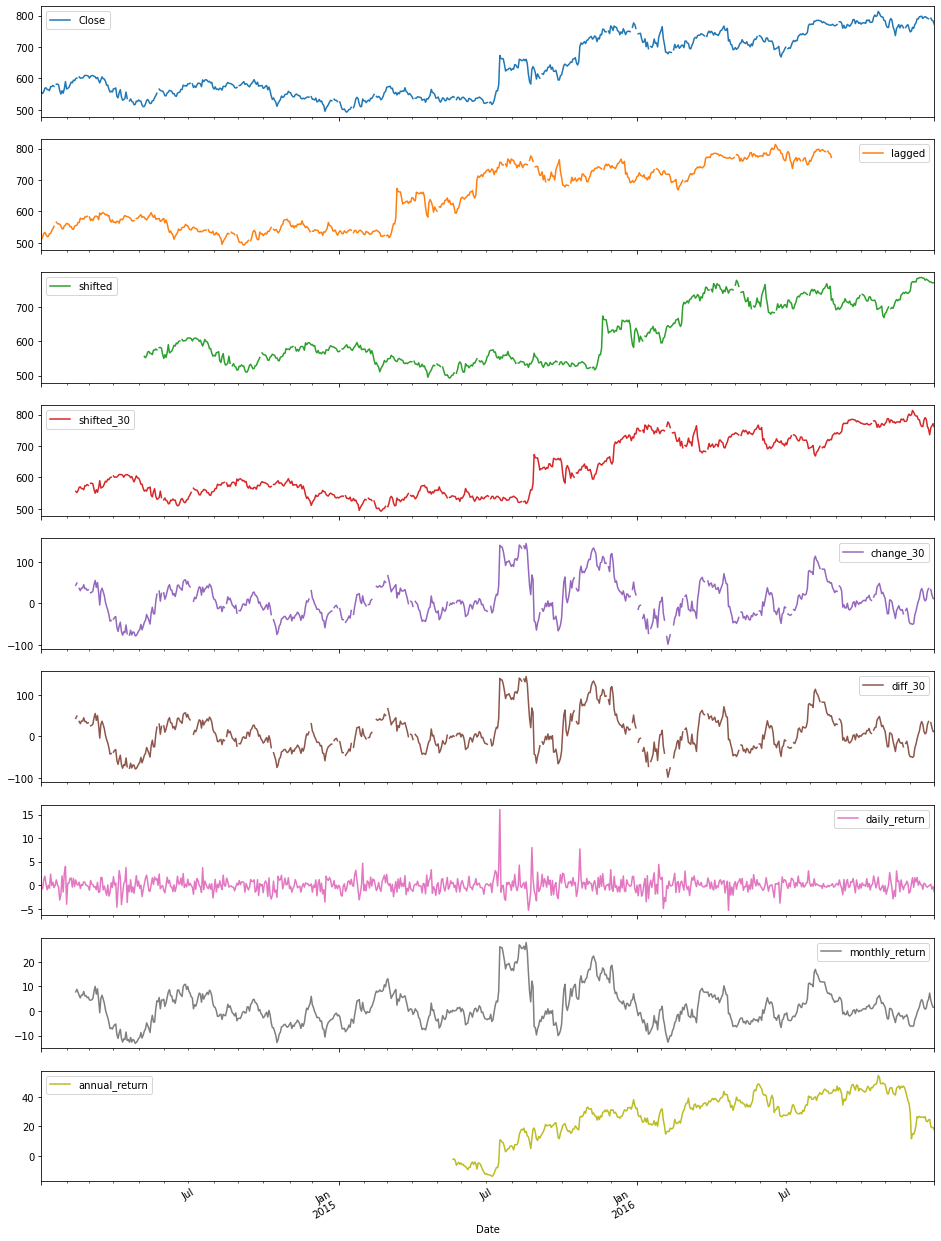

In [20]:
# Plot the result
google.plot(subplots=True, figsize=(16,24))
plt.show()